In [15]:
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
nu=data.isnull().any()
nu

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [17]:
data=data.drop('CustomerID',axis=1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [18]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Text(0.5, 1.0, 'spending scores distribution')

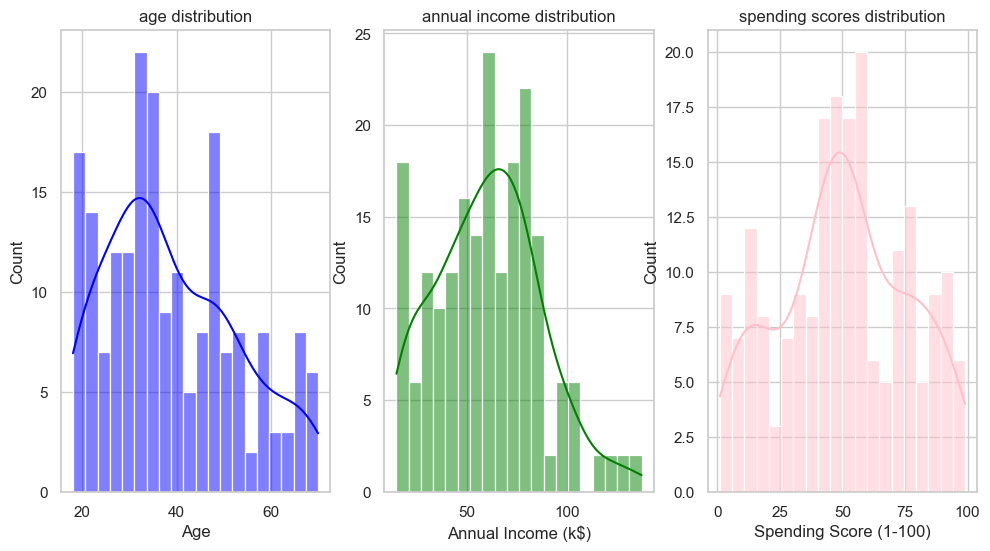

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
sns.histplot(data['Age'],kde=True,bins=20,color='blue')
plt.title('age distribution')

plt.subplot(1,4,2)
sns.histplot(data['Annual Income (k$)'],kde=True,bins=20,color='green')
plt.title('annual income distribution')

plt.subplot(1,4,3)
sns.histplot(data['Spending Score (1-100)'],kde=True,bins=20,color='pink')
plt.title('spending scores distribution')



In [20]:
data['Gender'].value_counts(normalize=True)




Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [21]:
data['Encoded Gender']=data['Gender'].map({'Male':0,'Female':1})
data


,Gender,Age,Annual Income (k$),Spending Score (1-100),Encoded Gender
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,0


In [22]:
data=data.drop('Gender',axis=1)
data


,Age,Annual Income (k$),Spending Score (1-100),Encoded Gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


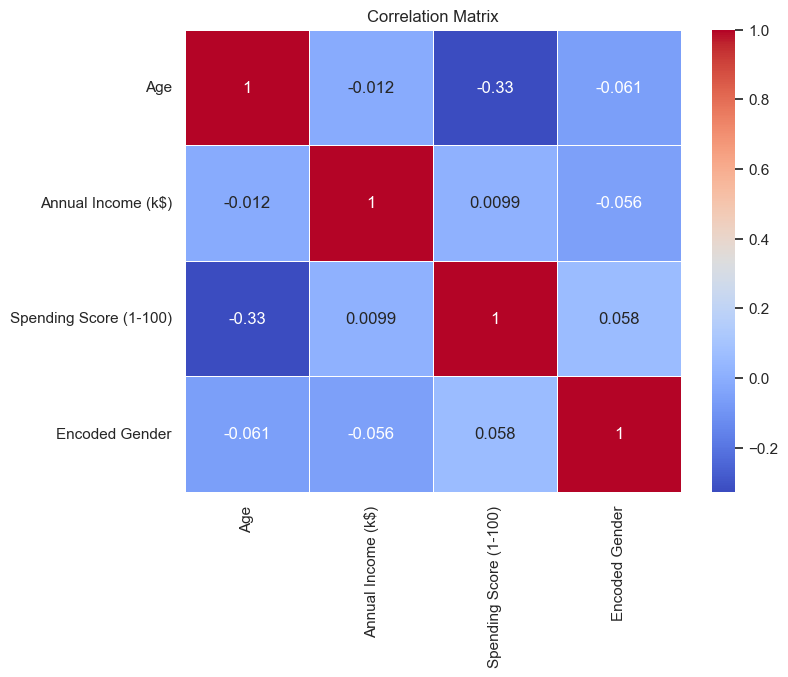

In [23]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled,columns=data.columns)


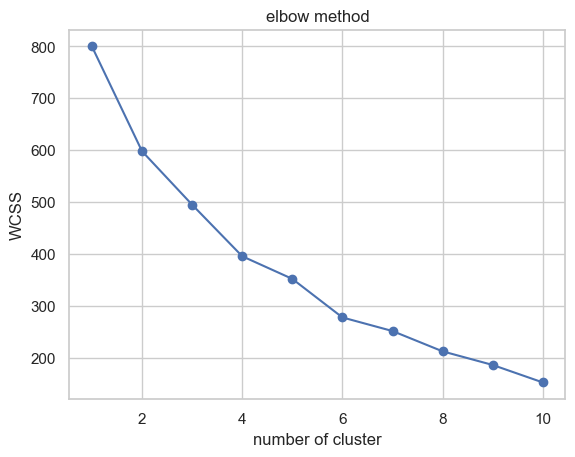

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('elbow method')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')
plt.show()

In [26]:
nclusters=5
kmeans=KMeans(n_clusters=nclusters,random_state=42)
data['Cluster']=kmeans.fit_predict(scaled_data)
data

,Age,Annual Income (k$),Spending Score (1-100),Encoded Gender,Cluster
0,19,15,39,0,2
1,21,15,81,0,2
2,20,16,6,1,4
3,23,16,77,1,4
4,31,17,40,1,4
...,...,...,...,...,...
195,35,120,79,1,3
196,45,126,28,1,3
197,32,126,74,0,2
198,32,137,18,0,1


In [27]:
sil_score=silhouette_score(scaled_data,data['Cluster'])
print(f'silhoutee score:{sil_score}')

silhoutee score:0.27191023466188324


         Age  Annual Income (k$)  Spending Score (1-100)  Encoded Gender
0  56.470588           46.098039               39.313725        0.490196
1  39.500000           85.150000               14.050000        0.000000
2  28.690476           60.904762               70.238095        0.000000
3  37.897959           82.122449               54.448980        1.000000
4  27.315789           38.842105               56.210526        1.000000


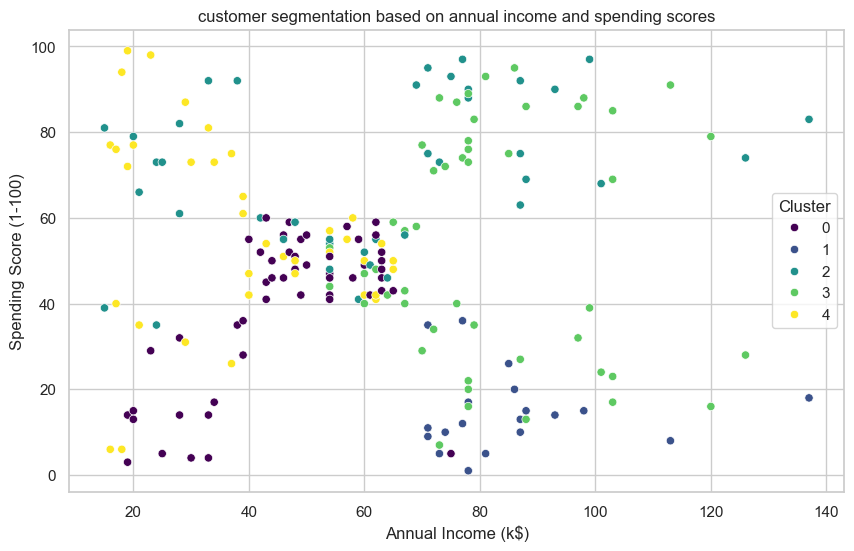

In [28]:
from sklearn.preprocessing import OneHotEncoder
cluster_centers=pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),columns=data.columns[:-1])
print(cluster_centers)
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=data['Cluster'],palette='viridis')
plt.title('customer segmentation based on annual income and spending scores')
plt.show()